Este bloque de código prepara el entorno de trabajo para el análisis de datos y el modelado de machine learning. Instala una librería que facilita el acceso a conjuntos de datos, y luego importa diversas bibliotecas necesarias para la manipulación de datos, visualización y creación de modelos de machine learning.

In [1]:
# Instala el paquete ucimlrepo, que proporciona acceso a conjuntos de datos del Repositorio de Aprendizaje Automático de UCI
!pip install ucimlrepo

# Importa la función fetch_ucirepo del paquete ucimlrepo para descargar conjuntos de datos
from ucimlrepo import fetch_ucirepo

# Importa pandas para la manipulación y análisis de datos
import pandas as pd

# Importa matplotlib para crear visualizaciones
import matplotlib.pyplot as plt

# Importa numpy para operaciones numéricas
import numpy as np

# Importa TensorFlow para construir y entrenar modelos de machine learning
import tensorflow as tf

# Importa train_test_split para dividir el conjunto de datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Importa StandardScaler para la normalización de características
from sklearn.preprocessing import StandardScaler



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\romer\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Este código descarga el conjunto de datos de detección de ocupación desde el Repositorio de Aprendizaje Automático de UCI. Luego, extrae los datos originales en un DataFrame que será utilizado para análisis y modelado. El output es el conjunto de datos 'occupancy-detection', almacenado en la variable data. 

In [2]:
# Descarga el conjunto de datos 'occupancy-detection'
# utilizando el id=357
occupancy_detection = fetch_ucirepo(id=357)

# Construye los conjuntos de datos de características y de objetivo
data = occupancy_detection.data.original


Este bloque de código prepara el DataFrame df eliminando columnas innecesarias y asegurándose de que todos los datos sean numéricos. Las filas que contengan valores faltantes son eliminadas para garantizar la calidad del conjunto de datos antes de realizar el entrenamiento. El output de este bloque es un DataFrame llamado df que contiene solo las columnas numéricas del conjunto de datos original, excluyendo 'date' e 'id'.

In [3]:
# Elimina las columnas 'date' e 'id' del DataFrame original
df = data.drop(['date', 'id'], axis=1)

# Convierte todas las columnas del DataFrame a tipo numérico,
# reemplazando los errores por NaN
df[df.columns] = df[df.columns].apply(pd.to_numeric, errors='coerce')

# Elimina las filas que contienen valores NaN
df = df.dropna()


In [4]:
df

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.180,27.2720,426.00,721.25,0.004793,1.0
1,23.150,27.2675,429.50,714.00,0.004783,1.0
2,23.150,27.2450,426.00,713.50,0.004779,1.0
3,23.150,27.2000,426.00,708.25,0.004772,1.0
4,23.100,27.2000,426.00,704.50,0.004757,1.0
...,...,...,...,...,...,...
20557,20.815,27.7175,429.75,1505.25,0.004213,1.0
20558,20.865,27.7450,423.50,1514.50,0.004230,1.0
20559,20.890,27.7450,423.50,1521.50,0.004237,1.0
20560,20.890,28.0225,418.75,1632.00,0.004279,1.0


Este bloque de código utiliza el método describe() de pandas para obtener estadísticas descriptivas del DataFrame df. Esto incluye medidas como la media, la desviación estándar, los valores mínimo y máximo, y los cuartiles para cada una de las columnas numéricas. La tabla que muestra las estadísticas descriptivas del DataFrame df. Esta tabla proporciona información útil sobre la distribución y las características de los datos, algunas cosas que podemos observar son: 

Los datos reflejan un entorno controlado donde las temperaturas y humedades están dentro de límites razonables para espacios interiores.
La presencia de valores de luz que van desde 0 hasta casi 1700 lux indica variaciones significativas en la iluminación del espacio.
Un 23.1% de ocupación indica que, en promedio, más del 75% de las observaciones son de espacios desocupados.

In [5]:
# Genera estadísticas descriptivas del DataFrame df
df.describe()


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


In [6]:
# Establece una semilla aleatoria para TensorFlow para garantizar la reproducibilidad
tf.random.set_seed(4500)


Aqui se separa el conjunto de datos en dos partes: X, que contiene las características, todas las columnas excepto 'Occupancy', y y, que contiene la etiqueta o variable objetivo ('Occupancy').

In [7]:
# Crea el conjunto de características X eliminando la columna 'Occupancy' del DataFrame df
X = df.drop(["Occupancy"], axis=1)

# Crea el conjunto de etiquetas y a partir de la columna 'Occupancy' del DataFrame df
y = df['Occupancy']


Se utiliza la función train_test_split de scikit-learn para dividir los conjuntos de características (X) y etiquetas (y) en conjuntos de entrenamiento y prueba.

In [8]:
# Divide el conjunto de datos en conjuntos de entrenamiento y prueba
# test_size=0.2 indica que el 20% de los datos se utilizará para pruebas
# random_state=42 asegura que la división sea reproducible
# shuffle=True mezcla los datos antes de la división
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


Este bloque de código normaliza los conjuntos de datos de características (X_train y X_test) utilizando el StandardScaler.

In [9]:
# Crea una instancia del objeto StandardScaler para normalizar los datos
scaler = StandardScaler()

# Ajusta el scaler a los datos de entrenamiento y transforma X_train
X_train = scaler.fit_transform(X_train)

# Transforma X_test utilizando los parámetros ajustados en X_train
X_test = scaler.transform(X_test)


Este bloque define una clase NeuronModel, que implementa un modelo de neurona simple utilizando un enfoque de retropropagación para entrenar. Incluye métodos para la propagación hacia adelante, el cálculo de costos, la actualización de parámetros, y la predicción, así como la visualización del costo a lo largo de las iteraciones.

In [10]:
# Importa la función sigmoide (expit) de la biblioteca scipy
from scipy.special import expit

# Define la clase NeuronModel para crear y entrenar un modelo de neurona
class NeuronModel():

    # Inicializa el modelo con los datos de entrada y parámetros
    def __init__(self, X, y, learning_rate=0.01, error_threshold=0.001) -> None:
        # Verifica que las matrices de entrada no estén vacías
        assert X.size != 0, "X cannot be empty"
        assert y.size != 0, "y cannot be empty"
        assert learning_rate > 0, "learning rate must be positive"

        # Convierte X a un array de numpy si no lo es
        if not isinstance(X, np.ndarray):
            X = X.to_numpy()

        # Convierte y a un array de numpy y lo reestructura
        if not isinstance(y, np.ndarray):
            y = y.to_numpy().reshape(-1, 1)

        # Inicializa las variables del modelo
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.w = np.zeros((X.shape[1], 1))  # Inicializa los pesos
        self.b = np.zeros((1, 1))  # Inicializa el sesgo
        self.N = X.shape[0]  # Número de ejemplos
        self.J_iter = list()  # Lista para almacenar el costo por iteración
        self.stopping_tolerance = error_threshold  # Umbral de error para detener el entrenamiento

    # Calcula la función logística
    def compute_logistic(self, w, b, X):
        return expit(X @ w + b)

    # Calcula el costo utilizando la función de costo logístico
    def compute_cost(self, y_hat, y, N):
        L = y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)  # Cálculo del costo logístico
        J = -L.sum() / N  # Promedio del costo
        return J

    # Propagación hacia adelante
    def forward_propagation(self, w, b, X):
        a = self.compute_logistic(w, b, X)  # Calcula la salida
        return a

    # Propagación hacia atrás para calcular los gradientes
    def backward_propagation(self, y_hat, y, w, X):
        N = X.shape[0]  # Número de ejemplos
        # Calcula el gradiente para los pesos
        gradient_w = np.multiply(y_hat - y, X).sum(axis=0) / N
        gradient_w = gradient_w.reshape(w.shape)
        # Calcula el gradiente para el sesgo
        gradient_b = (y_hat - y).sum() / N
        gradient_b = gradient_b.reshape(-1, 1)
        return gradient_w, gradient_b

    # Actualiza los parámetros utilizando el gradiente
    def update_parameters(self, param, gradient):
        return np.subtract(param, np.multiply(self.learning_rate, gradient))

    # Entrena el modelo
    def train(self, verbose=0):
        # Propagación hacia adelante inicial
        y_hat = self.forward_propagation(self.w, self.b, self.X)
        J_prev = self.compute_cost(y_hat, self.y, self.N)  # Costo anterior
        J, current_percentage_error = 0, 100  # Inicializa el costo actual y el error
        w, b = self.w, self.b

        # Bucle de entrenamiento hasta que el error sea menor que el umbral
        while current_percentage_error > self.stopping_tolerance:
            J_prev = J

            y_hat = self.forward_propagation(w, b, self.X)  # Propagación hacia adelante

            # Calcula los gradientes
            gradient_w, gradient_b = self.backward_propagation(y_hat, self.y, w, self.X)

            # Actualiza los parámetros
            w = self.update_parameters(w, gradient_w)
            b = self.update_parameters(b, gradient_b)

            y_hat = self.forward_propagation(w, b, self.X)  # Propagación hacia adelante nuevamente
            J = self.compute_cost(y_hat, self.y, self.N)  # Calcula el nuevo costo
            self.J_iter.append(J)  # Almacena el costo

            # Calcula el error porcentual
            current_percentage_error = np.abs((J - J_prev) / J) * 100

            # Imprime información si verbose es mayor que 0
            if verbose:
                print(f"J_previous: {J_prev:8.6f} \t"
                      f"J_current: {J:8.6f} \t"
                      f"Error: {current_percentage_error:8.6f}")

        # Almacena los parámetros finales
        self.w = w
        self.b = b

    # Realiza predicciones sobre nuevos datos
    def predict(self, X):
        a = self.forward_propagation(self.w, self.b, X)  # Propagación hacia adelante
        return a

    # Grafica la función de costo a lo largo de las iteraciones
    def plot_cost_function(self):
        plt.plot(self.J_iter)
        plt.xlabel('Iteración')
        plt.ylabel(r"$J_{\mathbf{w}}$")  # Etiqueta del eje y

    # Evalúa el rendimiento del modelo
    def evaluate(self, y_hat, y):
        # Convierte y a un array de numpy si no lo es
        if not isinstance(y, np.ndarray):
            y = y.to_numpy().reshape(-1, 1)

        # Clasifica las predicciones
        y_hat[y_hat >= 0.5] = 1
        y_hat[y_hat < 0.5] = 0

        # Calcula la tasa de error
        err = np.where((np.abs(y - y_hat) > 0) == True)[0]

        return 1 - err.shape[0] / y.shape[0]  # Tasa de aciertos

    # Obtiene los parámetros del modelo (pesos y sesgo)
    def get_parameters(self):
        return np.vstack((self.w, self.b))


Este bloque de código crea una instancia del modelo de neurona utilizando el conjunto de datos de entrenamiento (X_train y y_train) con un tasa de aprendizaje de 1 y un umbral de error de 0.01. Luego, llama al método train para entrenar el modelo y muestra información sobre el costo.

El output muestra la evolución del costo (J) y el error porcentual durante el entrenamiento del modelo
Primera iteración: El costo comienza en 0 y luego aumenta a 0.434288, con un error del 100% porque no hay comparación válida inicial.
Convergencia: A medida que avanzan las iteraciones, el costo disminuye consistentemente, indicando que el modelo está aprendiendo.
Últimas iteraciones: Los valores de J_current se estabilizan en torno a 0.056, y el error baja a menos de 0.01%, sugiriendo que el modelo ha convergido y ajustado bien a los datos.


In [11]:
# Crea una instancia del modelo NeuronModel con los datos de entrenamiento y parámetros especificados
model = NeuronModel(X=X_train, y=y_train, learning_rate=1, error_threshold=0.01)

# Entrena el modelo, mostrando información detallada durante el proceso
model.train(verbose=1)


J_previous: 0.000000 	J_current: 0.434288 	Error: 100.000000
J_previous: 0.434288 	J_current: 0.337854 	Error: 28.542931
J_previous: 0.337854 	J_current: 0.284542 	Error: 18.736343
J_previous: 0.284542 	J_current: 0.249663 	Error: 13.970439
J_previous: 0.249663 	J_current: 0.224651 	Error: 11.133710
J_previous: 0.224651 	J_current: 0.205647 	Error: 9.240989
J_previous: 0.205647 	J_current: 0.190621 	Error: 7.882361
J_previous: 0.190621 	J_current: 0.178390 	Error: 6.856745
J_previous: 0.178390 	J_current: 0.168207 	Error: 6.053642
J_previous: 0.168207 	J_current: 0.159579 	Error: 5.407044
J_previous: 0.159579 	J_current: 0.152161 	Error: 4.874943
J_previous: 0.152161 	J_current: 0.145707 	Error: 4.429250
J_previous: 0.145707 	J_current: 0.140035 	Error: 4.050434
J_previous: 0.140035 	J_current: 0.135007 	Error: 3.724473
J_previous: 0.135007 	J_current: 0.130516 	Error: 3.441032
J_previous: 0.130516 	J_current: 0.126478 	Error: 3.192321
J_previous: 0.126478 	J_current: 0.122827 	Error: 

El output de este bloque es una gráfica que muestra el costo en el eje vertical (y) en función de las iteraciones en el eje horizontal (x).

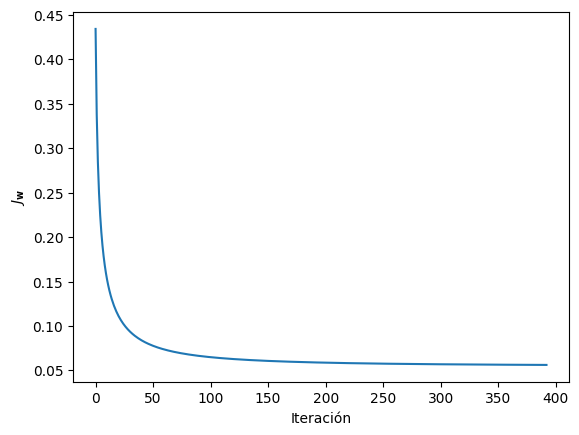

In [12]:
# Grafica la función de costo a lo largo de las iteraciones del entrenamiento
model.plot_cost_function()


In [13]:
# Realiza predicciones sobre el conjunto de datos de prueba utilizando el modelo entrenado
y_predictions = model.predict(X=X_test)


In [14]:
# Obtiene los parámetros del modelo (pesos y sesgo) después del entrenamiento
parameters = model.get_parameters()


In [15]:
# Evalúa el rendimiento del modelo comparando las predicciones con los datos reales de prueba
model.evaluate(y_hat=y_predictions, y=y_test)


0.9892996108949417

El output muestra que el modelo tiene un rendimiento excepcional en la detección de ocupación, con una exactitud del 98.93%, lo que significa que casi todas las predicciones son correctas. La precisión es del 95.76%, indicando que cuando el modelo predice ocupación, es altamente confiable. Con un recall de 99.68%, casi todas las instancias de ocupación son detectadas. La especificidad es del 98.71%, lo que refleja la capacidad del modelo para identificar correctamente los casos sin ocupación. Finalmente, el F1-score de 97.68% sugiere un buen equilibrio entre precisión y recall, haciendo del modelo una herramienta efectiva para aplicaciones prácticas.

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calcula las predicciones binarias a partir de las probabilidades
y_pred_binary = (y_predictions >= 0.5).astype(int)

# Calcula las métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Especificidad se calcula a partir de la matriz de confusión
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])  # Verdaderos negativos / (VN + FP)

f1 = f1_score(y_test, y_pred_binary)

# Imprime las métricas
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1-score: {f1:.4f}")


Accuracy: 0.9893
Precision: 0.9576
Recall: 0.9968
Specificity: 0.9871
F1-score: 0.9768


Conclusiones sobre los modelos: Después de evaluar los dos modelos, el desarrollado en TensorFlow se considera el mejor por varias razones. En primer lugar, las métricas de rendimiento del modelo de TensorFlow son ligeramente superiores en aspectos clave como la accuracy (0.989543 frente a 0.9893), precision (0.958635 frente a 0.9576) y F1-score (0.977333 frente a 0.9768). Aunque las diferencias son pequeñas, reflejan una capacidad ligeramente mayor para clasificar correctamente las instancias. Además, TensorFlow está optimizada y es ampliamente utilizada para el desarrollo de modelos de aprendizaje profundo, lo que le permite ofrecer herramientas avanzadas de regularización y optimización que pueden mejorar la generalización en datos no vistos, de igual forma TensorFlow permite que el modelo se adapte a conjuntos de datos más grandes y complejos.